In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
with open("./Ames_Housing_Feature_Description.txt","r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df=pd.read_csv("./Ames_outliers_removed.csv")
df.head()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [5]:
def nan_perc(df):
    nan_perc=100*df.isnull().sum()/len(df)
    nan_perc=nan_perc[nan_perc>0].sort_values()
    return nan_perc

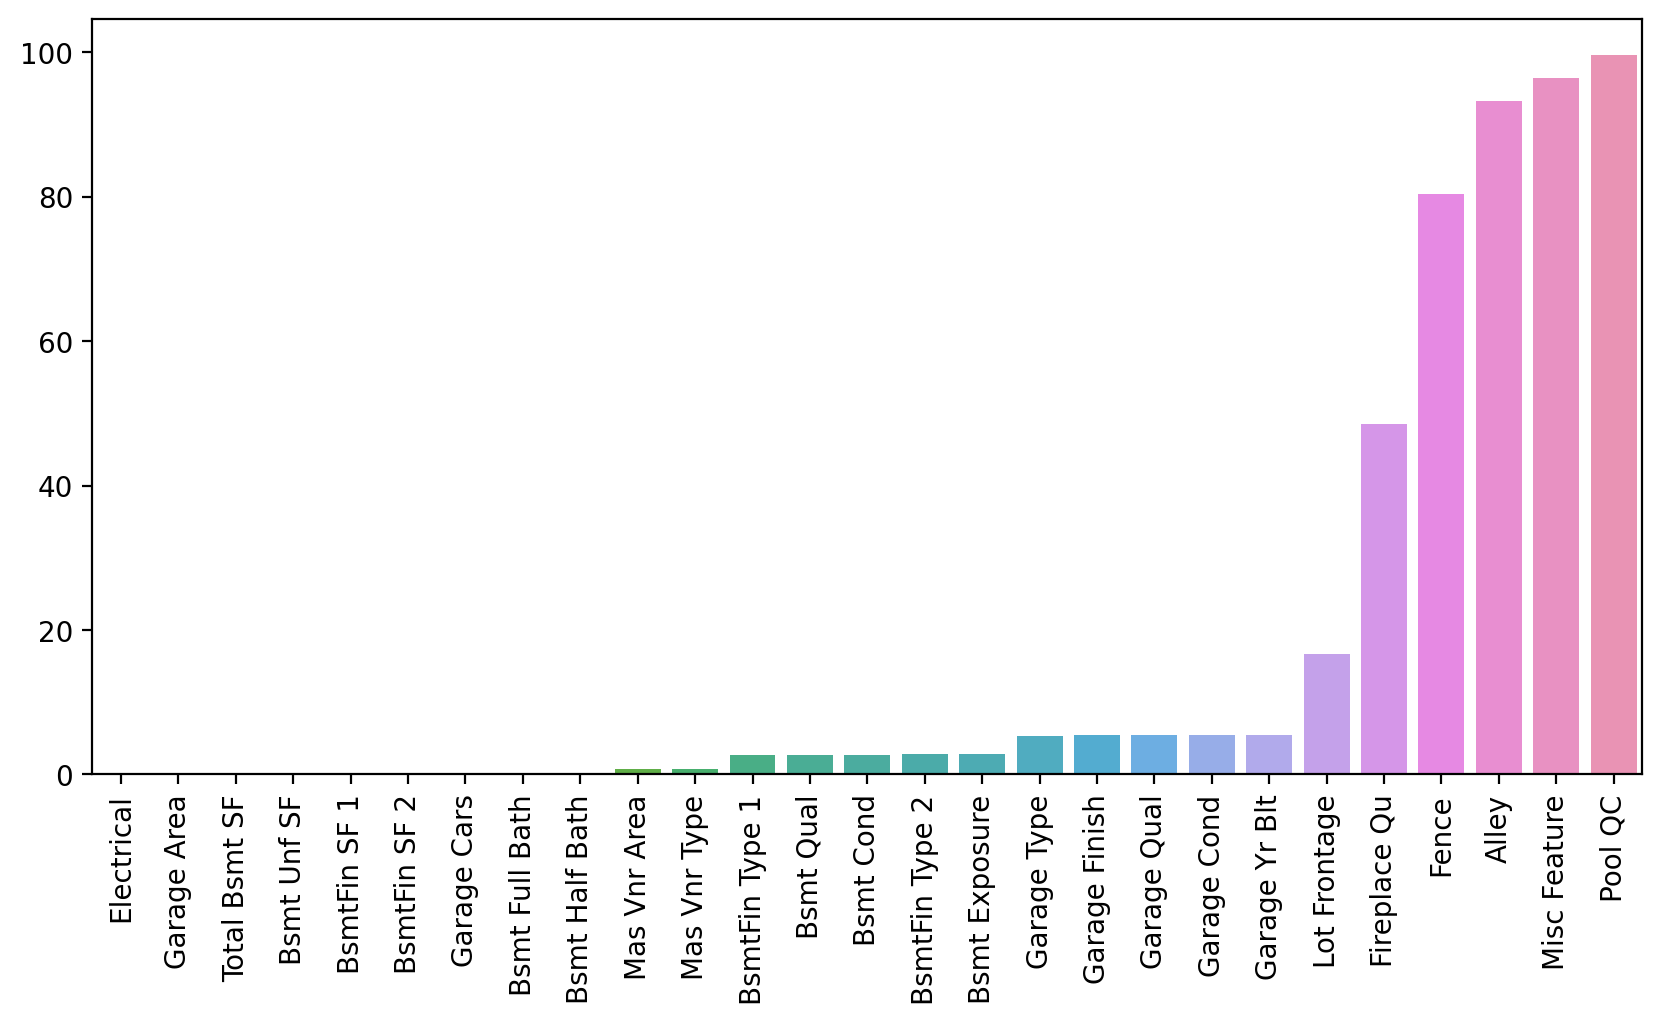

In [6]:
nan_values=nan_perc(df)
plt.figure(figsize=(10,5),dpi=200)
sbn.barplot(x=nan_values.index,y=nan_values)
plt.xticks(rotation=90);

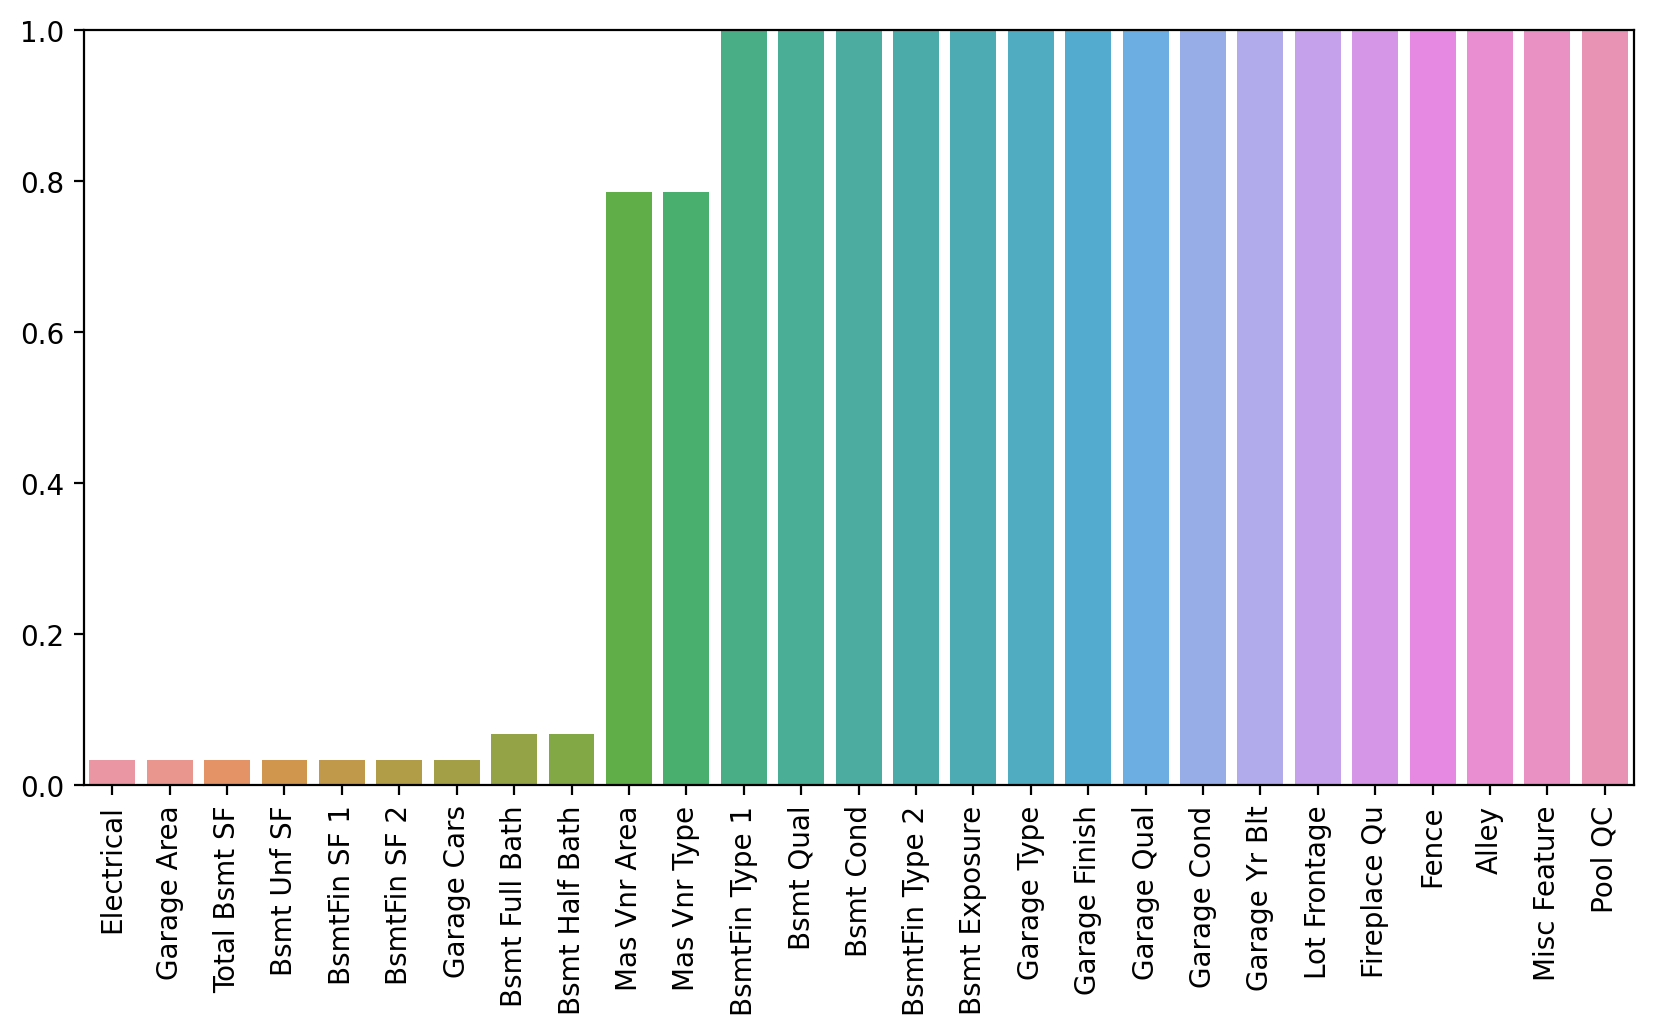

In [7]:
plt.figure(figsize=(10,5),dpi=200)
sbn.barplot(x=nan_values.index,y=nan_values)
plt.ylim(0,1)
plt.xticks(rotation=90);

In [8]:
df[["Bsmt Full Bath","Bsmt Half Bath","Bsmt Unf SF","BsmtFin SF 1","BsmtFin Type 2","Garage Cars","Total Bsmt SF","Garage Area","Electrical","BsmtFin SF 2","Mas Vnr Area", "Mas Vnr Type"]].head()

,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin Type 2,Garage Cars,Total Bsmt SF,Garage Area,Electrical,BsmtFin SF 2,Mas Vnr Area,Mas Vnr Type
0,1.0,0.0,441.0,639.0,Unf,2.0,1080.0,528.0,SBrkr,0.0,112.0,Stone
1,0.0,0.0,270.0,468.0,LwQ,1.0,882.0,730.0,SBrkr,144.0,0.0,None
2,0.0,0.0,406.0,923.0,Unf,1.0,1329.0,312.0,SBrkr,0.0,108.0,BrkFace
3,1.0,0.0,1045.0,1065.0,Unf,2.0,2110.0,522.0,SBrkr,0.0,0.0,None
4,0.0,0.0,137.0,791.0,Unf,2.0,928.0,482.0,SBrkr,0.0,0.0,None


In [9]:
df[["Bsmt Full Bath","Bsmt Half Bath"]]=df[["Bsmt Full Bath","Bsmt Half Bath"]].fillna(0)
df[["BsmtFin SF 1","Bsmt Unf SF","BsmtFin SF 2"]]=df[["BsmtFin SF 1","Bsmt Unf SF","BsmtFin SF 2"]].fillna(0)
df[["Garage Cars","Total Bsmt SF","Garage Area","Mas Vnr Area"]]=df[["Garage Cars","Total Bsmt SF","Garage Area","Mas Vnr Area"]].fillna(0)

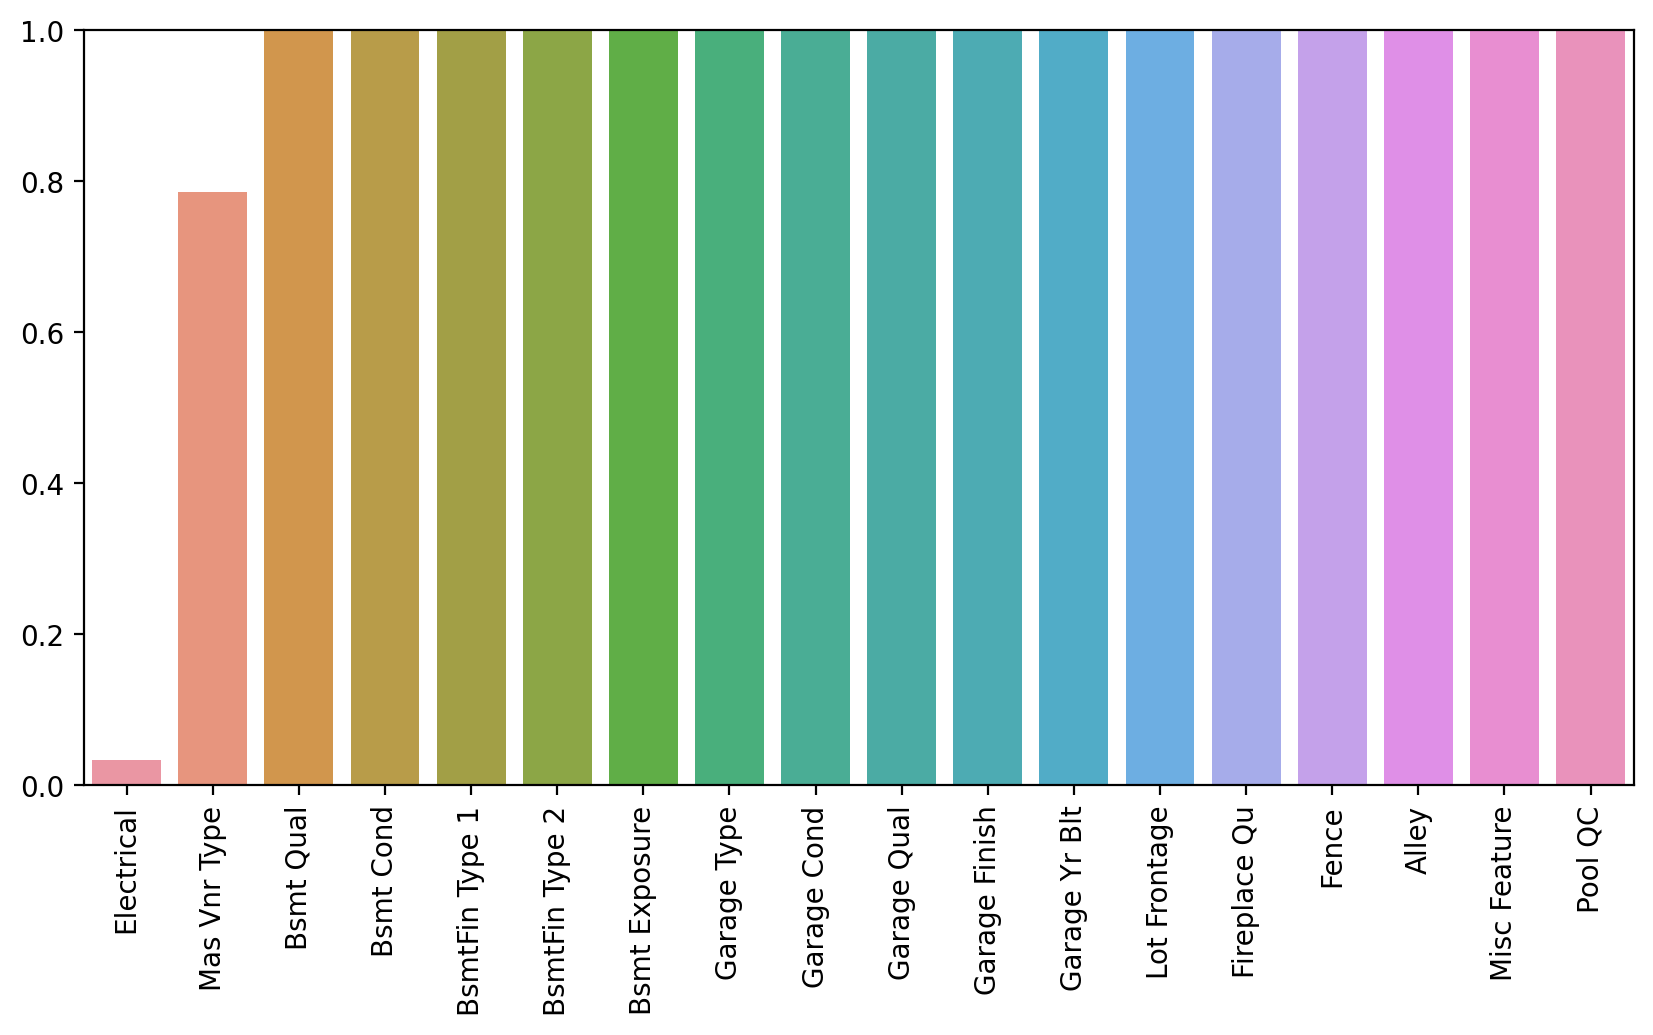

In [10]:
nan_values=nan_perc(df)
plt.figure(figsize=(10,5),dpi=200)
sbn.barplot(x=nan_values.index,y=nan_values)
plt.ylim(0,1)
plt.xticks(rotation=90);


In [13]:
df[["Electrical","BsmtFin Type 2","BsmtFin SF 2","Mas Vnr Type"]]=df[["Electrical","BsmtFin Type 2","BsmtFin SF 2","Mas Vnr Type"]].fillna("None")


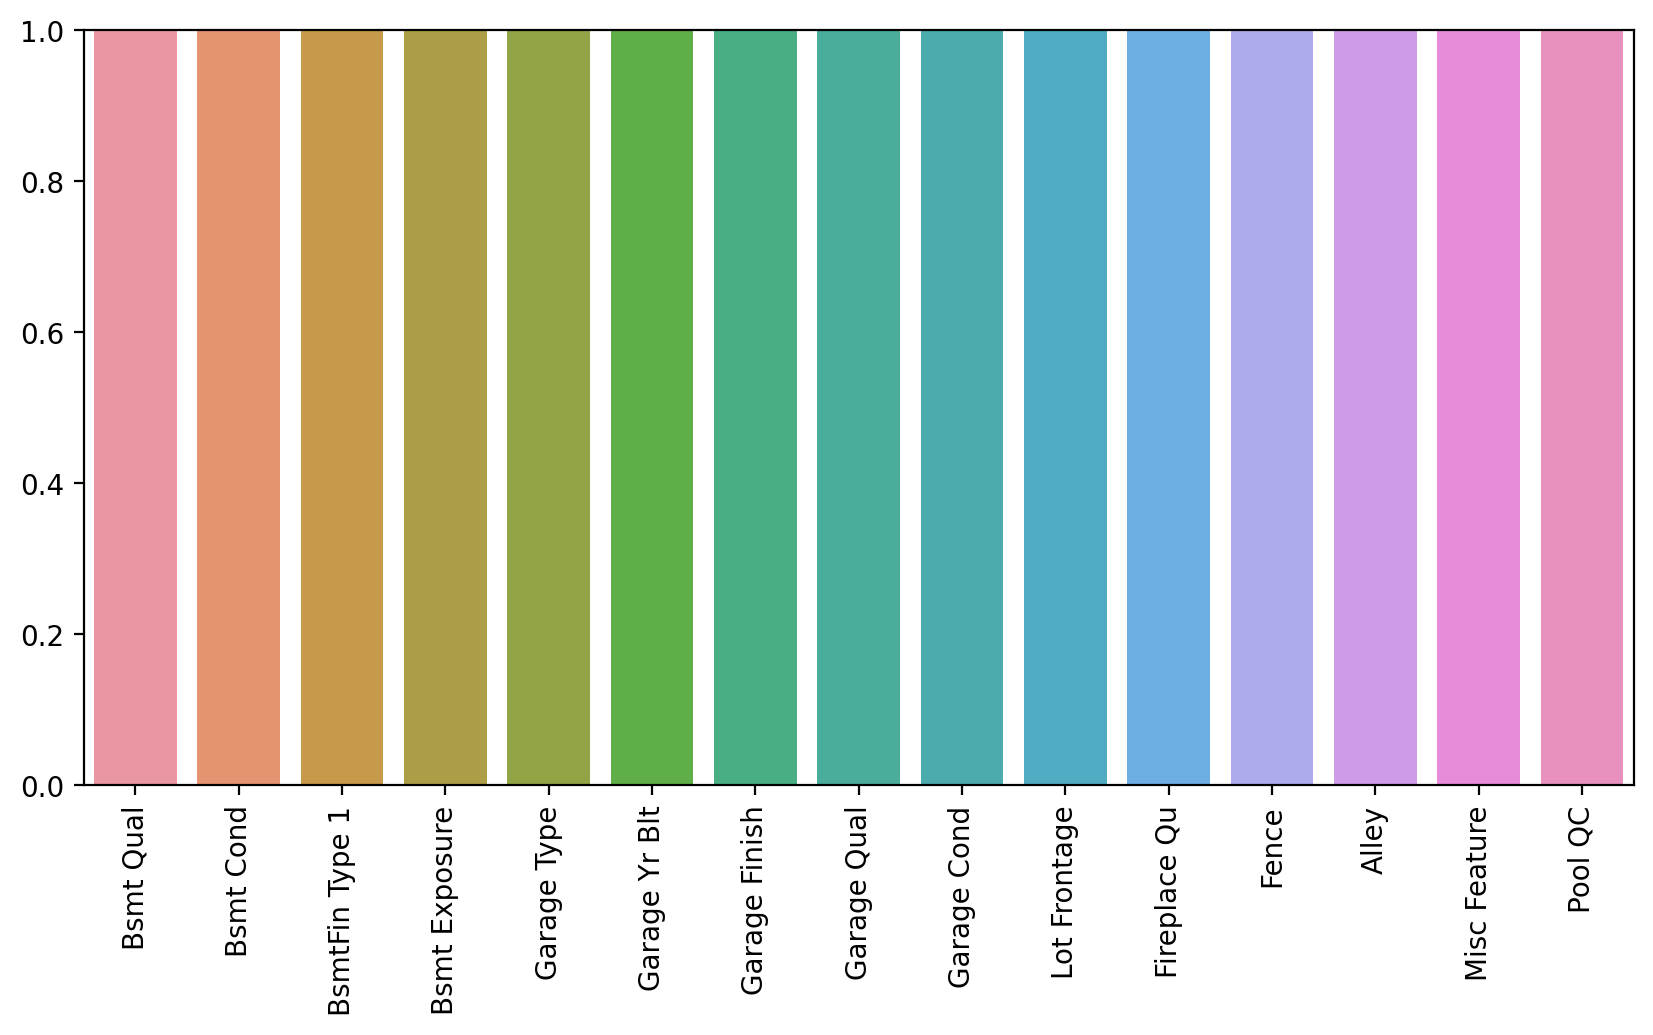

In [15]:
nan_values=nan_perc(df)
plt.figure(figsize=(10,5),dpi=200)
sbn.barplot(x=nan_values.index,y=nan_values)
plt.ylim(0,1)
plt.xticks(rotation=90);